# Marble Interaction NWB Tutorial

This tutorial demonstrates how to load and explore an NWB file containing only behavioral data from the marble interaction experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).

Contents:

- [Reading NWBFile locally](#read-nwb)
- [Access Subject Metadata](#access-subject)
- [Access Devices Metadata](#access-devices)
- [Access Behavioral Videos](#access-behavior)
- [Access Annotated Behavioral Events](#access-events)



# Reading an NWB file locally<a id="read-nwb"></a>


This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [1]:
from pynwb import NWBHDF5IO
from pathlib import Path
# Define the path to the NWB file
directory = Path("D:/kind_lab_conversion_nwb/marble_interaction")
session_id = "MI_Test"
subject_id = "408_Arid1b(3)"
nwbfile_path = directory / f"sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()

c:\Users\Utente\anaconda3\envs\kind_lab_to_nwb_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [2]:
print(nwbfile.experiment_description)

This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB. 
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing. 
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated marble interaction behaviorin different rat models 
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518, 
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515, 
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530)
using a plastic box arena (63 x 50 x 30 cm) with wood ch

In [3]:
print(nwbfile.session_description)

Experimental Day 3. Marble interaction test.
Rat placed in arena with woodchip bedding and 20 marbles
arranged in 4x5 grid for 20 min test period.



Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the Freeze_Log.xls table.

In [4]:
print(nwbfile.session_start_time)

2022-11-23 00:00:00+01:00


# Access Subject Metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [5]:
nwbfile.subject

subject pynwb.file.Subject at 0x2667166118400
Fields:
  age__reference: birth
  date_of_birth: 2022-09-02 00:00:00+02:00
  sex: M
  species: Rattus norvegicus
  subject_id: 408_Arid1b(3)

# Access Devices Metadata <a name="access-devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [6]:
nwbfile.devices["Arena"]

Arena pynwb.device.Device at 0x2667166211856
Fields:
  description: Plastic box identical to home cage base (63x50x30 cm) with white plastic panels
in frame around sides to total height of 90 cm

  manufacturer: Example Manufacturer

In [7]:
nwbfile.devices["Marbles"]

Marbles pynwb.device.Device at 0x2667166213824
Fields:
  description: 20 black shiny glass marbles (25mm diameter, Opal marble)
  manufacturer: House of Marbles UK

In [8]:
nwbfile.devices["BehavioralCamera"]

BehavioralCamera pynwb.device.Device at 0x2667166209552
Fields:
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  manufacturer: Example Manufacturer

# Access Behavioral Video <a name="access-behavior"></a>

The behavioral video is stored as an external `ImageSeries` in the NWB file.

In [9]:
video = nwbfile.acquisition["BehavioralVideo"]
video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,object
Shape,"(1,)"
Array size,8.00 bytes
Chunk shape,None


The video filepath:

In [10]:
video.external_file[0]

'D:\\Kind-CN-data-share\\behavioural_pipeline\\Marble Interaction\\Arid1b\\Arid1b(3)_MI\\Test\\converted\\2022-11-23_408_409.mp4'

The metadata of the device used to record the behavioral video:


In [11]:
video.device

BehavioralCamera pynwb.device.Device at 0x2667166209552
Fields:
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  manufacturer: Example Manufacturer

# Access Annotated Behavioral Events <a name="access-events"></a>

The `nwbfile.processing["events]` contains annotated events. These are stored in the `AnnotatedEventsTable` type. The `AnnotatedEventsTable` type is a subtype of `DynamicTable`, where each row corresponds to a different event type. The table has a ragged (variable-length) 1D column of event times, such that each event type (row) is associated with an array of event times

You can convert the table to a `pandas.DataFrame` for easier exploration:


In [12]:
behavioral_events = nwbfile.processing["events"]["AnnotatedBehavioralEvents"].to_dataframe()

C:\Users\Utente\AppData\Local\Temp\ipykernel_19892\853228197.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((time, idx-0.4), duration, 0.8,


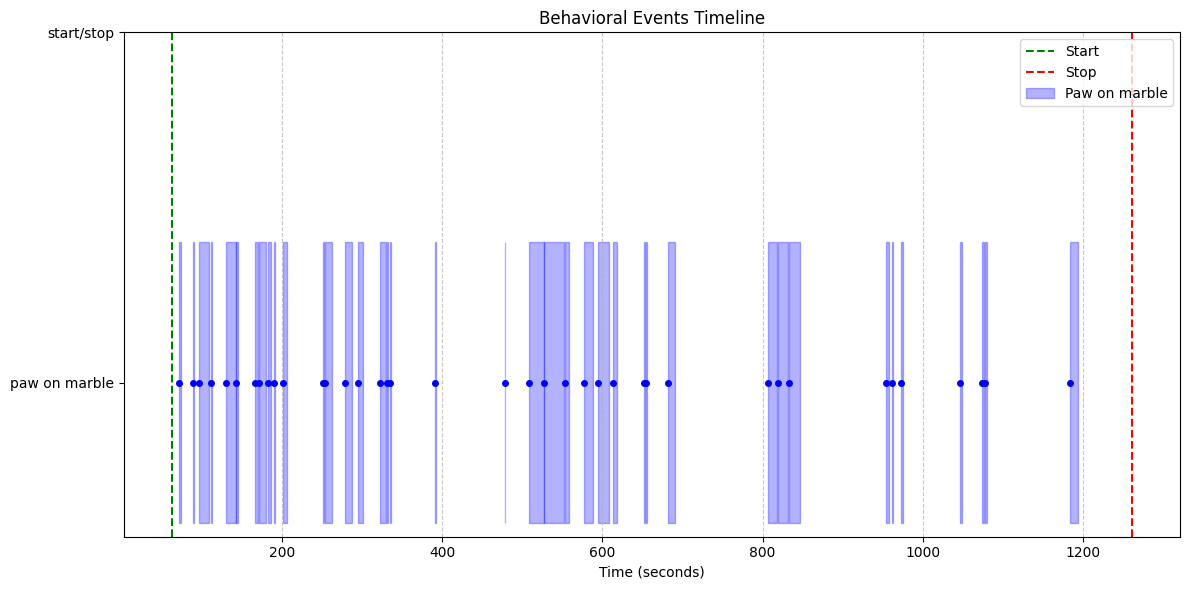

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Extract event types and their times
for idx, row in behavioral_events.iterrows():
    label = row['label']
    times = np.array(row['event_times'])
    durations = np.array(row['duration'])
    
    # For start/stop events, plot vertical lines as before
    if label == 'start/stop':
        ax.axvline(x=times[0], color='green', linestyle='--', label='Start')
        ax.axvline(x=times[1], color='red', linestyle='--', label='Stop')
    else:
        # For paw on marble events, plot faded rectangles
        for i, (time, duration) in enumerate(zip(times, durations)):
            if not np.isnan(duration):
                # Add a faded rectangle for the duration of the event
                rect = plt.Rectangle((time, idx-0.4), duration, 0.8, 
                                    alpha=0.3, color='blue', 
                                    edgecolor='blue', linewidth=1)
                ax.add_patch(rect)
                
                # Add a dot at the start of each event
                ax.plot(time, idx, 'bo', markersize=4)

# Add labels and title
ax.set_xlabel('Time (seconds)')
ax.set_yticks(range(len(behavioral_events)))
ax.set_yticklabels(behavioral_events['label'])
ax.set_title('Behavioral Events Timeline')
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Add a blue patch to the legend for the paw on marble events
from matplotlib.patches import Patch
blue_patch = Patch(color='blue', alpha=0.3, label='Paw on marble')
ax.legend(handles=[*by_label.values(), blue_patch], labels=[*by_label.keys(), 'Paw on marble'], loc='upper right')

plt.tight_layout()
plt.show()